<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 10 - Funciones de excitación disipativas
#### Lugano Damian

-------------------------

## Punto 1
### Consigna

![Alt text](./pics/Consigna.png)

### Desarrollo analítico

In [52]:
from IPython.display import IFrame
IFrame("./docs/TS10_1.pdf", width=950, height=1000)

#### Simulación simbólica

In [53]:
### ---- Imports ----

import sympy as sp
from pytc2.sintesis_dipolo import foster
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

### ---- Variable Compleja

s = sp.symbols('s ', complex=True)

Z = (s**2 + 6*s + 8)/(s**2 + 4*s + 3)
print_latex(a_equal_b_latex_s('Z(s)', Z))

<IPython.core.display.Math object>

In [54]:
### Remocion parcial en inf para imponer un cero en sigma=-6

from pytc2.remociones import remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma

sigma_R1C1 = -6

Z2, Z1 = remover_valor_en_dc(Z, sigma_zero = sigma_R1C1 )


print_latex(a_equal_b_latex_s('Z_1', Z1))
print_latex(a_equal_b_latex_s('Z_2', Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [55]:
Y4, YR1C1, R1, C1 = remover_polo_sigma(1/Z2, sigma=sigma_R1C1, isImpedance=False, isRC=True)

print_latex(a_equal_b_latex_s('Y_3', YR1C1))
print_latex(a_equal_b_latex_s('Y_4', Y4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [56]:
sigma_R2C2 = -7/2

Z6, Z2 = remover_valor_en_dc(1/Y4, sigma_zero = sigma_R2C2 )


print_latex(a_equal_b_latex_s('Z_6', Z6))
print_latex(a_equal_b_latex_s('Z_2', Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [57]:
Y8, YR2C2, R2, C2 = remover_polo_sigma(1/Z6, sigma=sigma_R2C2, isImpedance=False, isRC=True)

print_latex(a_equal_b_latex_s('Y_5', YR2C2))
print_latex(a_equal_b_latex_s('Y_8', Y8))

Z3=84/67

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [58]:
###----- Valores de R y C ----

print_latex(a_equal_b_latex_s('Z_1', Z1))
print_latex(a_equal_b_latex_s('R_1', R1))
print_latex(a_equal_b_latex_s('C_1', C1))
print_latex(a_equal_b_latex_s('Z_2', Z2))
print_latex(a_equal_b_latex_s('R_2', R2))
print_latex(a_equal_b_latex_s('C_2', C2))
print_latex(a_equal_b_latex_s('Z_3', Z3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [59]:
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie, dibujar_tanque_RC_derivacion,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC

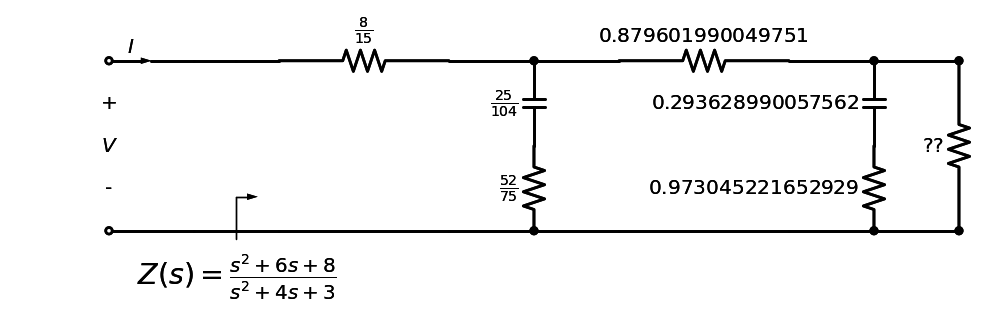

In [60]:
# Red resultante
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Z(s)',  
                 Z, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Resistor, Z1)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_derivacion(d, sym_R_label= R1, capacitor_lbl= C1 )

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_serie(d, Resistor, Z2)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_derivacion(d, sym_R_label= R2, capacitor_lbl= C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, 1/Z3)


display(d)